# Data Interaction Analysis

In [1]:
%matplotlib inline

In [2]:
import math
import pickle

import numpy as np
import matplotlib.pyplot as plt

In [3]:
clf = pickle.load(open('boston_fitted_gbregr.pkl', 'rb'))
feature_names = np.array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
                          'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
params = clf.get_params()

In [4]:
# make a check to see feature_names has the correct size
feature_importance = clf.feature_importances_
if len(feature_names) != feature_importance.shape[0]:
    raise ValueError("The passed feature_names is not valid. The order \
                      of the feature_names should match indices of the \
                      data the model was trained on.")
n_features = feature_importance.shape[0]

<font color="blue">
## Boosting Steps Analysis

In [5]:
X_train = pickle.load(open('X_train.pkl', 'rb'))
y_train = pickle.load(open('y_train.pkl', 'rb'))

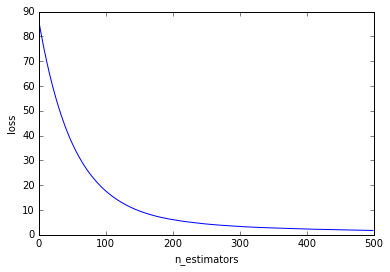

In [6]:
plt.plot(clf.train_score_)
plt.xlabel('n_estimators')
plt.ylabel('loss')
plt.show()

In [7]:
def staged_error_function(staged_preds, y_true, axis=1):
    """
    :param axis: 0 for row, 1 for column
    """
    return np.mean(np.abs(staged_preds - y_true), axis=axis)

In [8]:
X_test = pickle.load(open('X_test.pkl', 'rb'))
y_test = pickle.load(open('y_test.pkl', 'rb'))

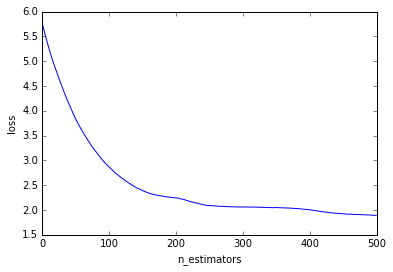

In [9]:
staged_preds = np.array(list(clf.staged_predict(X_test)))
staged_errors = staged_error_function(staged_preds, y_test, axis=1)

plt.plot(staged_errors)
plt.xlabel('n_estimators')
plt.ylabel('loss')
plt.show()

<font color="blue">
## Analysis using Illumine

In [10]:
from illumine import woodland

/home/itzjustricky/anaconda2/envs/py33/lib/python3.3/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)


In [12]:
leaf_values = woodland.get_tree_predictions(clf, X_test)
foliage = woodland.dismantle_ensemble(clf, feature_names=feature_names,
                                      display_relation=True)

In [60]:
def make_boxplot_ready(np_array, max_size=None):
    ready_data = []
    if max_size is None: end_num = leaf_values.shape[0]
    else: end_num = min(max_size, leaf_values.shape[0])

    for i in range(end_num):
        ready_data.append(leaf_values[i, :])
    return ready_data

In [61]:
leaf_bpformat = make_boxplot_ready(leaf_values)

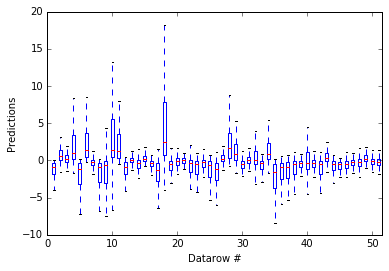

In [75]:
fig, ax = plt.subplots(1)
ax.boxplot(leaf_bpformat, showfliers=False)
ax.set_xticks(np.arange(0, 51, 10))
ax.set_xticklabels(np.arange(0, 51, 10))
ax.set_xlabel('Datarow #')
ax.set_ylabel('Predictions')
plt.show()